In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('vendas_limpo.xlsx', parse_dates=['data'] )
display(df)

,data,loja,categoria,produto,quantidade,valor_venda,valor_unitario
0,2024-07-20,Vento Norte,Eletrodomesticos,Aquecedor,5,405.55,81.11
1,2024-05-30,Vento Norte,Sazonal,Guarda-Chuva,6,2866.20,477.70
2,2024-01-25,Vento Norte,Roupas,Calça,8,3292.72,411.59
3,2024-07-10,Chuva Clara,Roupas,Casaco,5,1294.95,258.99
4,2024-08-31,Porto Sol,Sazonal,Manta Térmica,2,957.96,478.98
...,...,...,...,...,...,...,...
450,2024-08-23,Porto Sol,Eletrodomesticos,Ventilador,4,1545.72,386.43
451,2024-12-19,Vento Norte,Eletrodomesticos,Ventilador,1,230.89,230.89
452,2024-05-12,Vila Neve,Infantil,Blusa Infantil,6,441.30,73.55
453,2024-03-08,Vila Neve,Eletrodomesticos,Ar-Condicionado,1,293.93,293.93


Análise de Dados

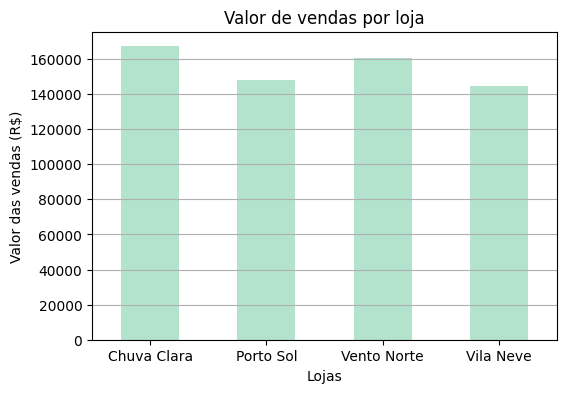

In [3]:
#1
total_valor_vendas_loja = df.groupby('loja')['valor_venda'].sum()


total_valor_vendas_loja.plot(kind='bar', colormap='Pastel2', figsize=(6,4))
plt.title('Valor de vendas por loja')
plt.xlabel('Lojas')
plt.ylabel('Valor das vendas (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show() 

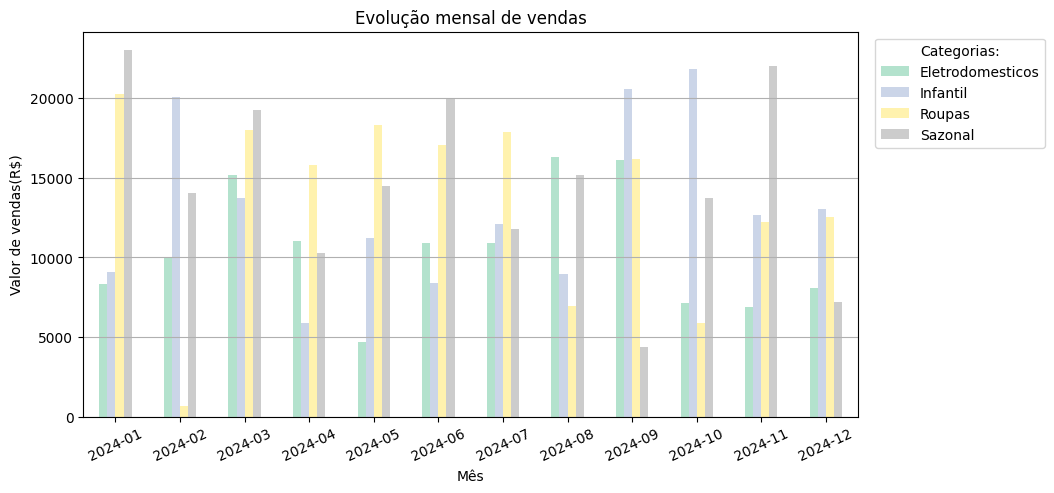

In [115]:
#2
df_analise = df
df_analise['data_mensal'] = df_analise['data'].dt.to_period('M')
tab_vendas_mensais = df.groupby(['data_mensal', 'categoria'])['valor_venda'].sum().unstack()



tab_vendas_mensais.plot(kind='bar', colormap='Pastel2', figsize=(10,5))
plt.title('Evolução mensal de vendas')
plt.xlabel('Mês')
plt.ylabel('Valor de vendas(R$)')
plt.xticks(rotation=25)
plt.legend(title = "Categorias:",loc='upper right', bbox_to_anchor=(1.25, 1) )
plt.grid(axis= 'y')
plt.show()

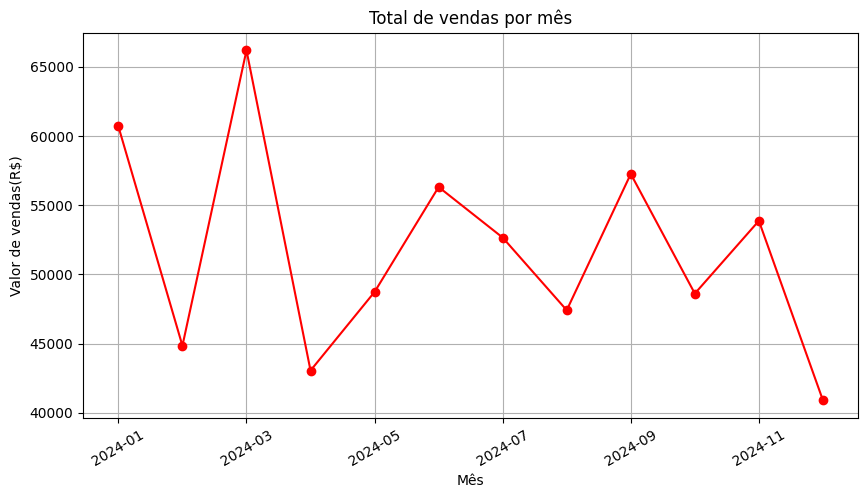

In [9]:
#3
df_analise = df
df_analise['data_mensal'] = df_analise['data'].dt.to_period('M')

tab_vendas_mensais = df.groupby(['data_mensal'])['valor_venda'].sum()
tab_vendas_mensais.index = tab_vendas_mensais.index.strftime('%Y-%m')  # Formata o índice


tab_vendas_mensais.plot(marker='o', linestyle='-', figsize=(10,5), color='red')
plt.title("Total de vendas por mês")
plt.xlabel('Mês')
plt.ylabel('Valor de vendas(R$)')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


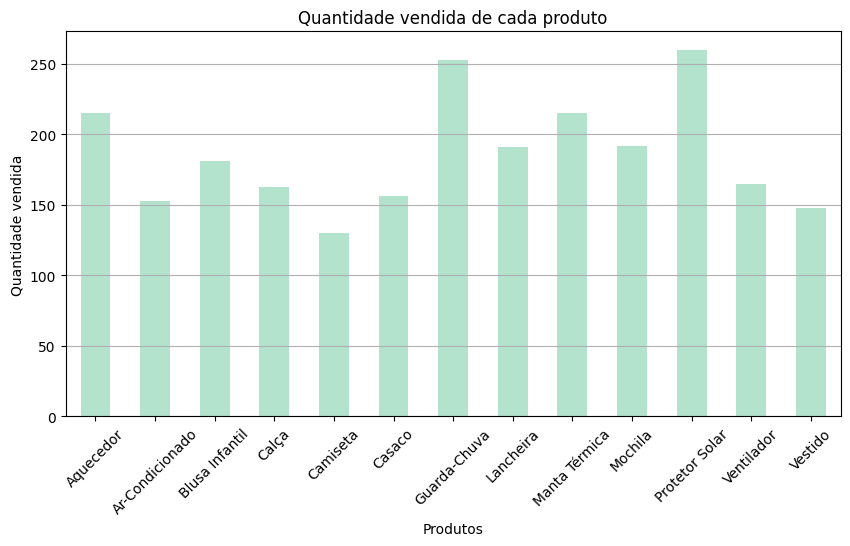

In [38]:
#4 

tab_vendas_produto = df.groupby(['produto'])['quantidade'].sum()


tab_vendas_produto.plot(kind='bar', colormap='Pastel2',figsize=(10,5))
plt.title('Quantidade vendida de cada produto')
plt.xlabel('Produtos')
plt.ylabel('Quantidade vendida')
plt.xticks(rotation=45)
plt.grid(axis= 'y')
plt.show()

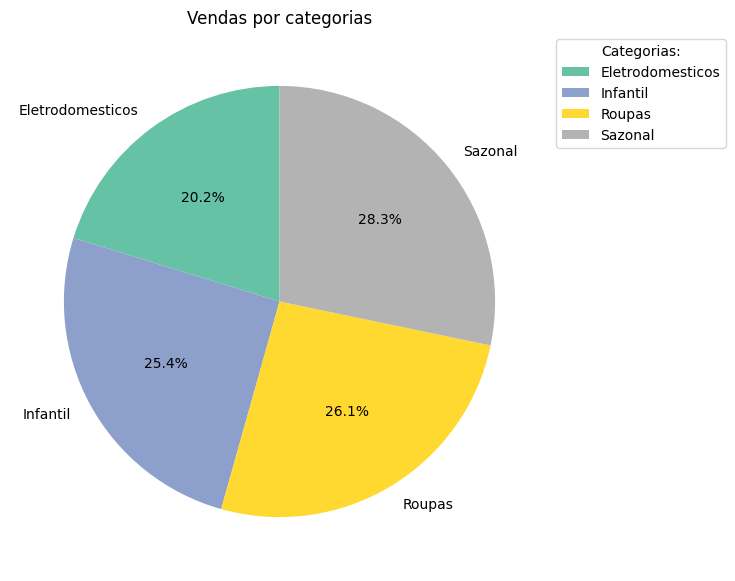

In [114]:
#5

tab_vendas_categoria = df.groupby(['categoria'])['valor_venda'].sum()

tab_vendas_categoria.plot(kind='pie', colormap='Set2',figsize=(14,7), startangle = 90, autopct='%1.1f%%')
plt.title('Vendas por categorias')
plt.ylabel('')
plt.legend(title = "Categorias:",loc='upper left', bbox_to_anchor=(1, 1) )
plt.show()

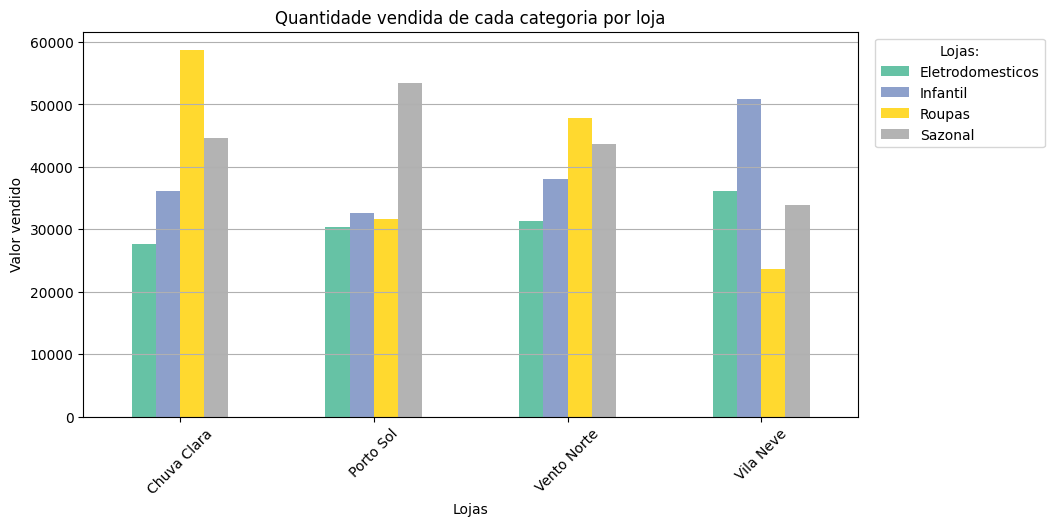

In [113]:
#6

tab_vendas_categoria_loja = df.groupby(['loja', 'categoria'])['valor_venda'].sum().unstack()

tab_vendas_categoria_loja.plot(kind='bar', colormap='Set2',figsize=(10,5))
plt.title('Quantidade vendida de cada categoria por loja')
plt.xlabel('Lojas')
plt.ylabel('Valor vendido')
plt.legend(title = "Lojas:",loc='upper right', bbox_to_anchor=(1.25, 1) )
plt.xticks(rotation=45)
plt.grid(axis= 'y')
plt.show()

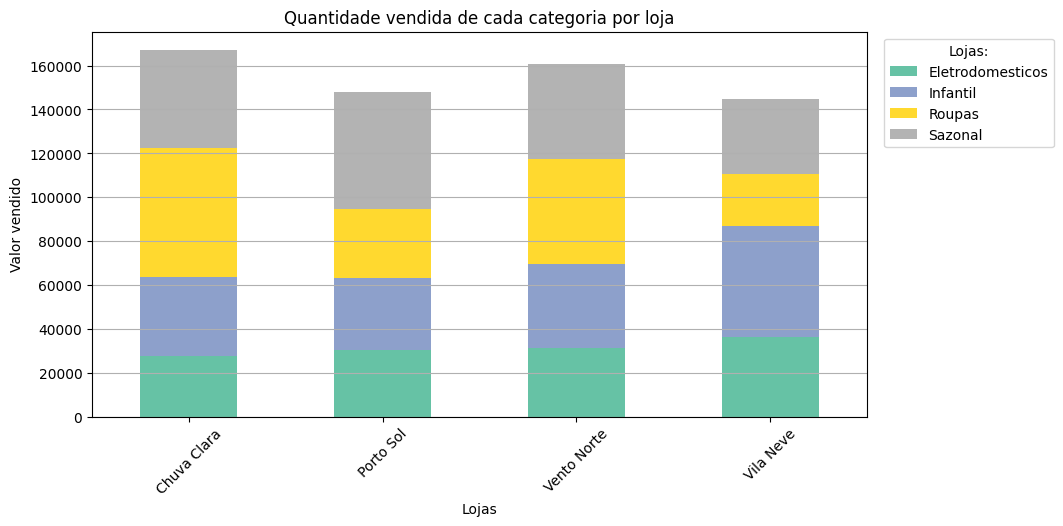

In [112]:
#7

tab_vendas_categoria_loja.plot(kind='bar', colormap='Set2',figsize=(10,5), stacked=True)
plt.title('Quantidade vendida de cada categoria por loja')
plt.xlabel('Lojas')
plt.ylabel('Valor vendido')
plt.legend(title = "Lojas:",loc='upper right', bbox_to_anchor=(1.25, 1) )
plt.xticks(rotation=45)
plt.grid(axis= 'y')
plt.show()